In [138]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')
plt.style.use('homework')

import cv2 as cv
from PIL import Image
import array_to_latex

img_path = "../img/img_proc/"

## Images

In [139]:
pi_arr = np.ones((8,9), dtype="uint8")*255
pi_arr[2,2:7] = 0
for i in [3, 4, 5]:
    pi_arr[i, [3, 6]] = 0

pi_img = Image.fromarray(pi_arr, mode="L")
pi_img

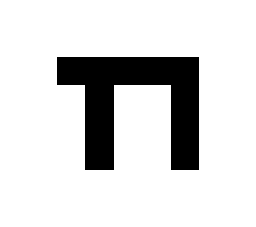

In [140]:
def resize(img, width=256, save=None):
    (w, h) = img.size
    scale = width / w
    out = img.resize([int(scale * w), int(scale*h)],
        resample=Image.Resampling.NEAREST)
    
    if save is not None:
        out.save(img_path+save)
    return out

resize(pi_img, save="pi.png")

In [141]:
array_to_latex.to_ltx(pi_arr/255, frmt='{:.0f}')

\begin{bmatrix}
  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1 \\
  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1 \\
  1  &  1  &  0  &  0  &  0  &  0  &  0  &  1  &  1 \\
  1  &  1  &  1  &  0  &  1  &  1  &  0  &  1  &  1 \\
  1  &  1  &  1  &  0  &  1  &  1  &  0  &  1  &  1 \\
  1  &  1  &  1  &  0  &  1  &  1  &  0  &  1  &  1 \\
  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1 \\
  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1 
\end{bmatrix}


In [142]:
poppy_arr = cv.imread("../img/about/poppy.jpg")

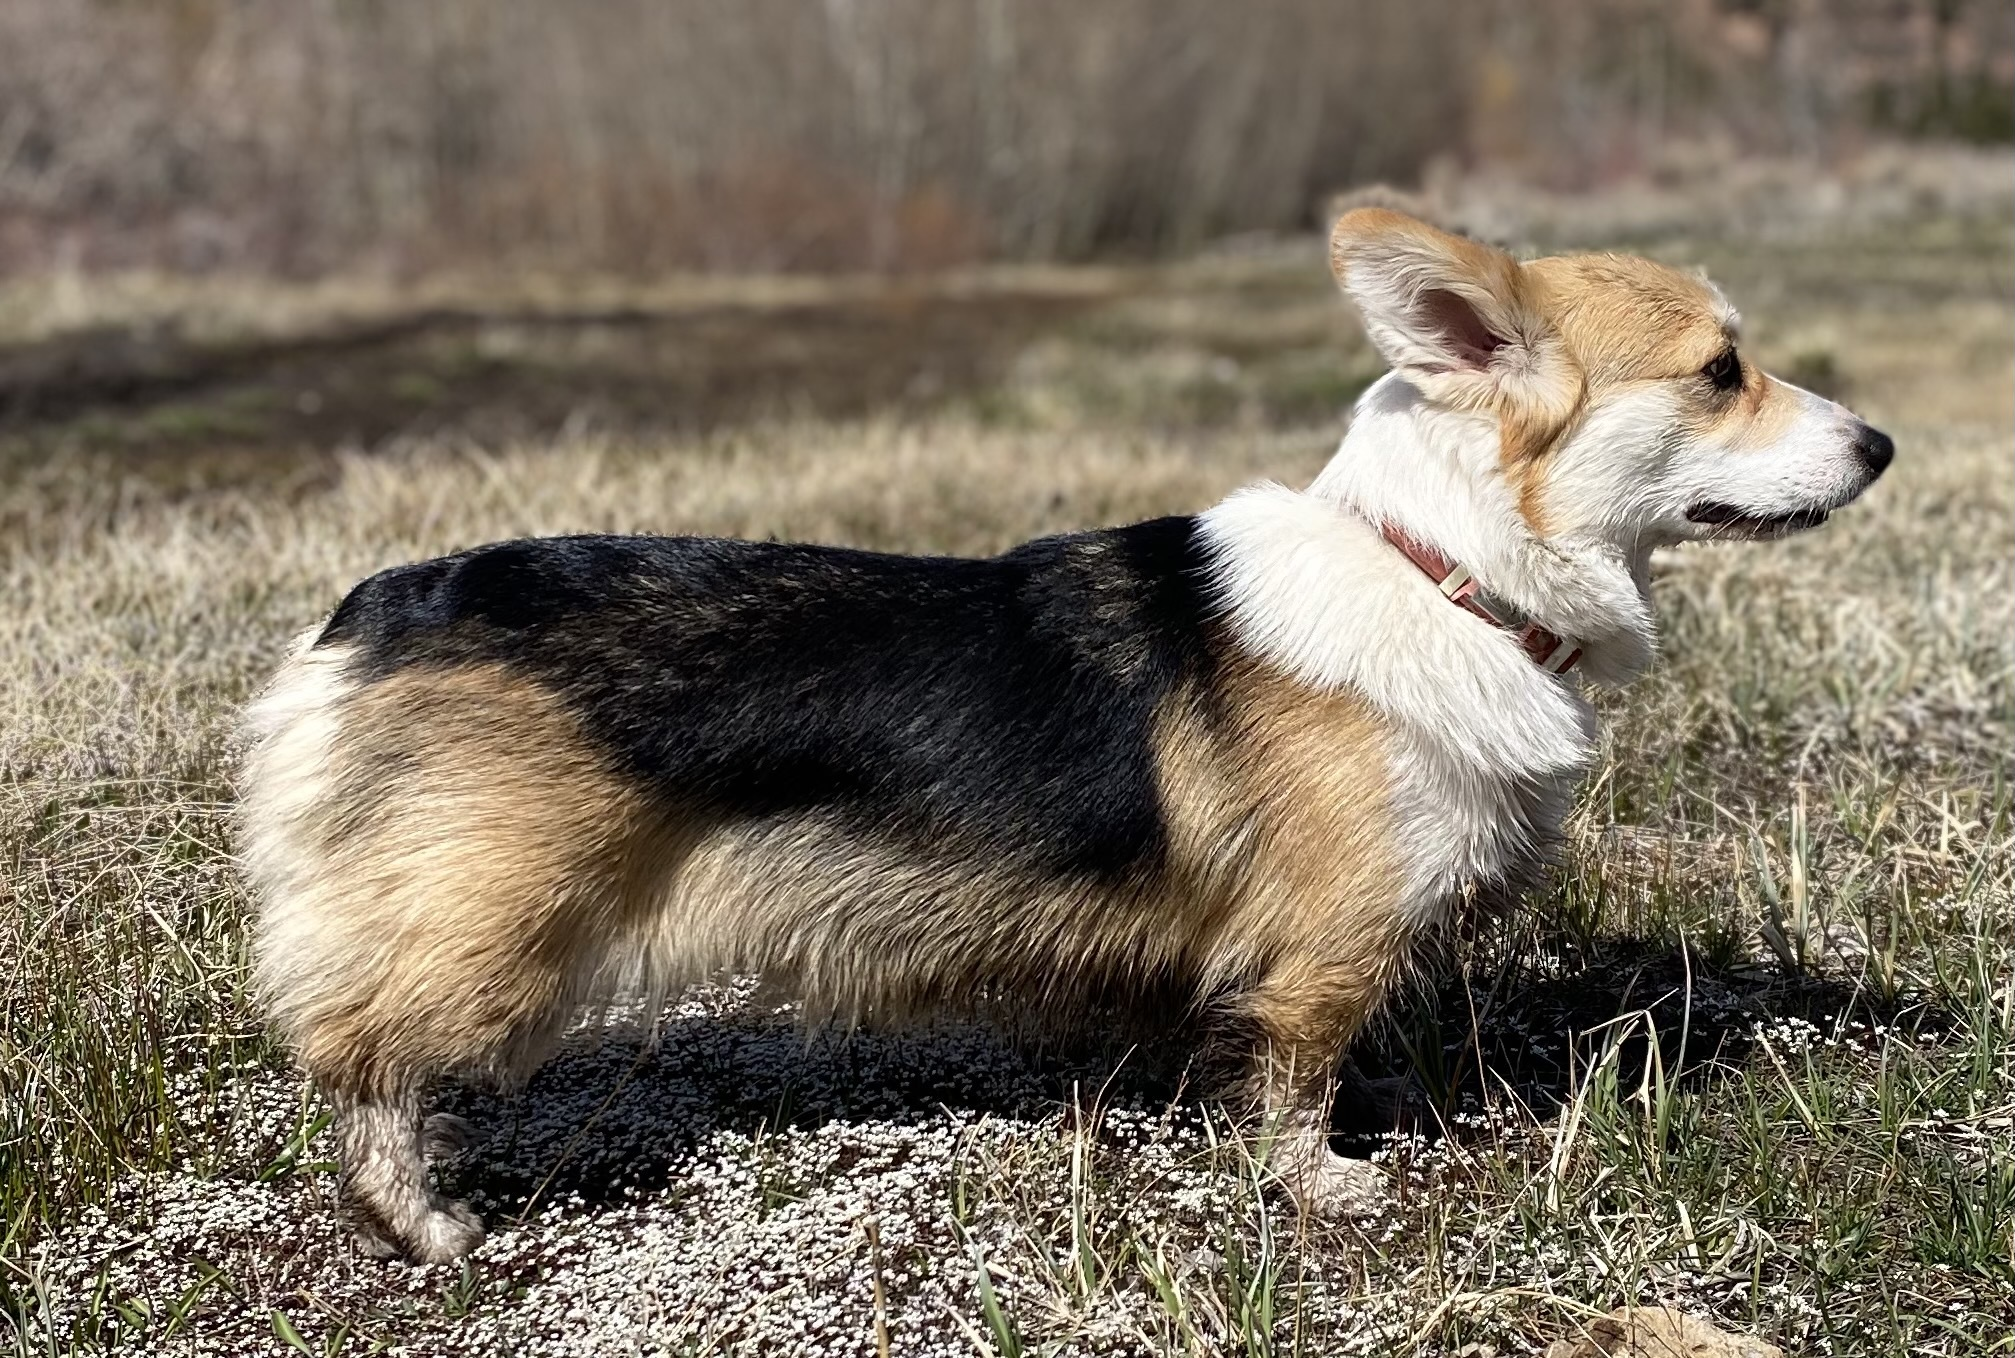

In [143]:
poppy = Image.open("../img/about/poppy.jpg")
poppy

In [144]:
print(poppy.size)
poppy.size[0]*poppy.size[1]

(2015, 1358)


2736370

In [145]:
cx = 1700
cy = 400

ss = np.linspace(400, 10)

imgs = []
for s in ss:
    s = int(s)
    box = (cx-s, cy-s, cx+s, cy+s)
    r = resize(poppy.crop(box))
    imgs.append(r)

for _ in range(10):
    imgs.append(r)

In [146]:
imgs[0].save(img_path+"poppy_zoom.gif",
    save_all=True, append_images=imgs[1:], duration=40, loop=0)

In [198]:
def img_histogram(phist, titles=None):
    fig, ax = plt.subplots(3, 1)
    cmap = ['Red', 'Green', 'Blue']
    if titles is None:
        titles = cmap
    ymax = 0
    xticks = np.linspace(0, 1, 11)
    xrng = np.linspace(0, 1, 256)
    for i in range(3):
        ax[i].plot(xrng, phist[:,i], color=cmap[i])
        ax[i].set_xlim(0,1)
        ax[i].set_xticks(xticks)
        ax[i].set_ylabel(titles[i])
        _, ytop = ax[i].get_ylim()
        if ytop > ymax:
            ymax = ytop
        ax[i].yaxis.set_ticklabels([])
        if i != 2:
            ax[i].xaxis.set_ticklabels([])
            
    for i in range(3):
        ax[i].set_ylim(top=ymax)
    return fig, ax

array([ 85,  85, 170])

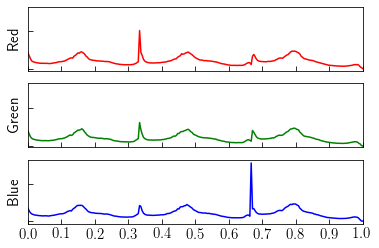

In [199]:
phist = poppy.histogram()
phist = np.array(phist).reshape(-1, 3)
fig, axs = img_histogram(phist)
fig.savefig(img_path+"poppy_histogram.png")
phist.argmax(axis=0)

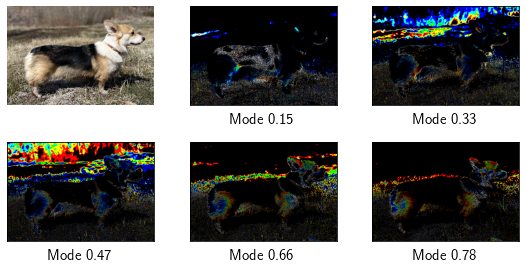

In [178]:
modes = [.15, .33, .47, .66, .78]
w = 10

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=(8, 4))
axs[0,0].imshow(cv.cvtColor(poppy_arr, cv.COLOR_BGR2RGB))
axs[0,0].axis('off')
i = 0
j = 1
for mode in modes:
    ax = axs[i,j%3]
    ax.set_xlabel(f"Mode {mode}")
    mode = mode * 255

    masked = np.where(
        np.logical_and(poppy_arr > mode-w, poppy_arr < mode+w),
        255, 0).astype(np.uint8)
    
    ax.imshow(cv.cvtColor(masked, cv.COLOR_BGR2RGB))
    ax.yaxis.set_ticklabels([])
    ax.xaxis.set_ticklabels([])
    
    j = j+1
    if j%3 == 0:
        i += 1

fig.savefig(img_path+"poppy_hist_modes.png")

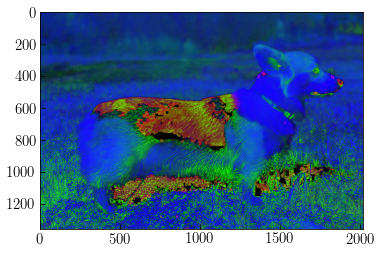

In [180]:
hsv = cv.cvtColor(poppy_arr, cv.COLOR_BGR2HSV)
plt.imshow(hsv)

In [195]:
hsv.shape

(1358, 2015, 3)

In [196]:
counts = []
for i in range(3):
    cnts, bins = np.histogram(hsv[:, :, i], 256, [0, 256])
    counts.append(cnts)
counts = np.array(counts).reshape(-1,3)
counts.shape

(256, 3)

In [208]:
hsv[:,:,2].max()

255

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:ylabel='Hue'>, <AxesSubplot:ylabel='Saturation'>,
        <AxesSubplot:ylabel='Value'>], dtype=object))

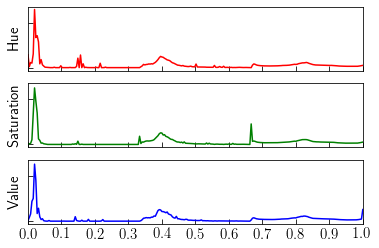

In [202]:
img_histogram(counts, ["Hue", "Saturation", "Value"])

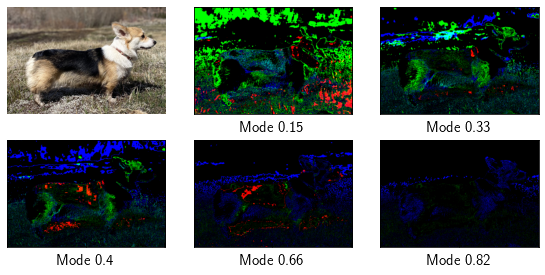

In [209]:
modes = [.15, .33, .4, .66, .82]
w = 10

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=(8, 4))
axs[0,0].imshow(cv.cvtColor(hsv, cv.COLOR_HSV2RGB))
axs[0,0].axis('off')
i = 0
j = 1
for mode in modes:
    ax = axs[i,j%3]
    ax.set_xlabel(f"Mode {mode}")
    mode = mode * 255

    masked = np.where(
        np.logical_and(hsv > mode-w, hsv < mode+w),
        255, 0).astype(np.uint8)
    
    # ax.imshow(cv.cvtColor(masked, cv.COLOR_HSV2RGB))
    ax.imshow(masked)
    ax.yaxis.set_ticklabels([])
    ax.xaxis.set_ticklabels([])
    
    j = j+1
    if j%3 == 0:
        i += 1

# fig.savefig(img_path+"poppy_hist_modes.png")

In [210]:
import scipy.misc
from sklearn import cluster

face = scipy.misc.face(gray=True)
face.shape

(768, 1024)

In [212]:
k = 5
rng = np.random.default_rng(0)

X = face.reshape((-1, 1))
km = cluster.KMeans(n_clusters=k)
km.fit(X)
values = km.cluster_centers_.squeeze()
labels = km.labels_

In [222]:
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape
vmin = face.min()
vmax = face.max()

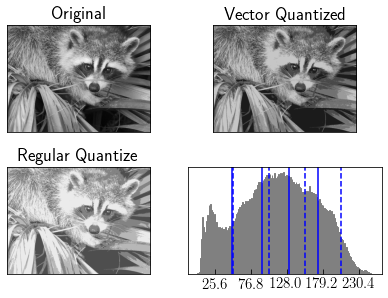

In [242]:
fig, axs = plt.subplots(2, 2, figsize=(6, 4.4), tight_layout=True)
# Original face
axs[0, 0].imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)
axs[0,0].set_title("Original")
axs[0, 0].set_yticks(())
axs[0, 0].set_xticks(())
# Compressed face
axs[0, 1].imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
axs[0,1].set_title("Vector Quantized")
axs[0, 1].set_yticks(())
axs[0, 1].set_xticks(())
# Equal bins face
reg_values = np.linspace(0, 256, k + 1)
reg_labels = np.searchsorted(reg_values, face)
reg_values = 0.5 * (reg_values[1:] + reg_values[:-1])  # mean
reg_face = np.choose(reg_labels.ravel(), reg_values, mode="clip")
reg_face.shape = face.shape
axs[1,0].imshow(reg_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
axs[1,0].set_title("Regular Quantize")
axs[1, 0].set_yticks(())
axs[1, 0].set_xticks(())
# Histogram
axs[1,1].hist(X, bins=256, color=".5", edgecolor=".5")
axs[1,1].set_yticks(())
axs[1,1].set_xticks(reg_values)
values = np.sort(values)
for c1, c2 in zip(values[:-1], values[1:]):
    axs[1,1].axvline(0.5 * (c1 + c2), color='b')

for c1, c2 in zip(reg_values[:-1], reg_values[1:]):
    axs[1,1].axvline(0.5 * (c1 + c2), color='b', linestyle="--")